Style GAN

In [1]:
#import stuff
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, LeakyReLU, AveragePooling2D, Add, Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend
import matplotlib.pyplot as plt
import numpy as np

Parameters

In [2]:
batch_size = 32
depth = 32

Load and process the data

In [4]:
#load raw data
raw_ds = tf.keras.preprocessing.image_dataset_from_directory('D:\Datasets\keras_png_slices_data\keras_png_slices_train', labels=None, color_mode='grayscale', batch_size=batch_size)
print(raw_ds)

#check range of values in raw data
image_batch = next(iter(raw_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

#normalise the data
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset=-1)
norm_ds = raw_ds.map(lambda img: (normalization_layer(img)))

#check range of values in raw data
image_batch = next(iter(norm_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))


Found 9664 files belonging to 1 classes.
<BatchDataset shapes: (None, 256, 256, 1), types: tf.float32>
0.0 255.0
-1.0 1.0


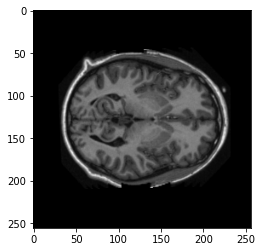

In [5]:
#visualise raw data
for images in raw_ds.take(1):
    plt.imshow(images[0].numpy().astype("float32"), cmap='gray')
    plt.show()

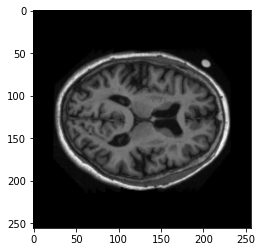

In [6]:
#visualise norm data
for images in norm_ds.take(1):
    plt.imshow(images[0].numpy().astype("float32"), cmap='gray')
    plt.show()

Networks

In [ ]:
#Conv2DMod layer

class ModConv2D (keras.layers.Layer):
    def __init__(self, trainable=True, name=None, dtype=None, dynamic=False, **kwargs):
        super().__init__(trainable=trainable, name=name, dtype=dtype, dynamic=dynamic, **kwargs)
        #define all the parameters of the layer
    
    def build(self, input_shape):
        #define weights after shape of input is known

        return super().build(input_shape)

    def call(self, inputs, *args, **kwargs):
        #execute the code when the layer is used
            #modulation stuff
        return super().call(inputs, *args, **kwargs)

In [ ]:
#define generator
#mapping network
    #for taking an image (style) and converting it to latent space to use in the weights of the synthesis network
#synthesis network
    #network used to generate images using input style and noise
    #skip connections

def g_block():
    return

def make_generator_model ():
    
    return

In [ ]:
#create generator
generator = make_generator_model()
generator.summary()

In [7]:
#define discriminator
    #residual connections

def d_block(inputs, filters, pooling=True):
    residual = Conv2D(filters, 1)(inputs)

    out = Conv2D(filters, (3,3), padding='same')(inputs)
    out = LeakyReLU(0.2)(out)
    out = Conv2D(filters, (3,3), padding='same')(out)
    out = LeakyReLU(0.2)(out)

    out = Add()([residual, out])

    if pooling:
        out = AveragePooling2D()(out)

    return out

def make_discriminator_model():
    inputs = Input(shape=(256, 256, 1))

    x = d_block(inputs, depth)
    x = d_block(x, depth * 2)
    x = d_block(x, depth * 4)
    x = d_block(x, depth * 8)
    x = d_block(x, depth * 16, pooling=False)

    #classification stuff
    x = Flatten()(x)
    x = Dense(1)(x)

    model = Model(inputs= inputs, outputs = x)

    return model

In [9]:
#create discriminator
discriminator = make_discriminator_model()
discriminator.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 256, 256, 32) 320         input_4[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_12 (LeakyReLU)      (None, 256, 256, 32) 0           conv2d_20[0][0]                  
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 256, 256, 32) 9248        leaky_re_lu_12[0][0]             
____________________________________________________________________________________________

Training

In [ ]:
#define training step

In [ ]:
#define training loop

In [ ]:
#run training loop

Visualise outcome

In [ ]:
#losses and inference